In [6]:
# download dados de treino
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-03-02 01:39:27--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 172.253.63.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   121MB/s    in 1.2s    

2023-03-02 01:39:29 (121 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [7]:
# download dados de validação
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-03-02 01:39:32--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 172.253.63.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  72.4MB/s    in 0.2s    

2023-03-02 01:39:33 (72.4 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



unzip dados

In [8]:
import zipfile

# unzip dados de treino
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# unzip dados de validação
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [27]:
import os

train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [28]:
train_horse_names = os.listdir(train_horse_dir)
print(f"Dados de Treino Cavalos: {train_horse_names[:5]}")

train_human_names = os.listdir(train_human_dir)
print(f"Dados de Treino Humanos: {train_human_names[:5]}")

print()
print('=+='*40)
print()

validation_horse_names = os.listdir(validation_horse_dir)
print(f"Dados de Validação Cavalos: {validation_horse_names[:5]}")

validation_human_names = os.listdir(validation_human_dir)
print(f"Dados de Validação Humanos: {validation_human_names[:5]}")

Dados de Treino Cavalos: ['horse25-6.png', 'horse42-8.png', 'horse29-9.png', 'horse46-8.png', 'horse40-8.png']
Dados de Treino Humanos: ['human15-06.png', 'human07-22.png', 'human01-21.png', 'human07-09.png', 'human10-30.png']

=+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+=

Dados de Validação Cavalos: ['horse2-183.png', 'horse4-000.png', 'horse5-589.png', 'horse5-458.png', 'horse5-402.png']
Dados de Validação Humanos: ['valhuman02-09.png', 'valhuman02-17.png', 'valhuman02-19.png', 'valhuman02-13.png', 'valhuman05-26.png']


In [29]:
print(f'Total dados de treino das imagens de cavalos: {len(os.listdir(train_horse_dir))}')
print(f'Total dados de treino das imagens de humanos: {len(os.listdir(train_human_dir))}')

print()
print('=+='*40)
print()

print(f'Total dados de validação das imagens de cavalos: {len(os.listdir(validation_horse_dir))}')
print(f'Total dados de validação das imagens de humanos: {len(os.listdir(validation_human_dir))}')


Total dados de treino das imagens de cavalos: 500
Total dados de treino das imagens de humanos: 527

=+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+=

Total dados de validação das imagens de cavalos: 128
Total dados de validação das imagens de humanos: 128


Plotar nossas imagens de Cavalos e Humanos

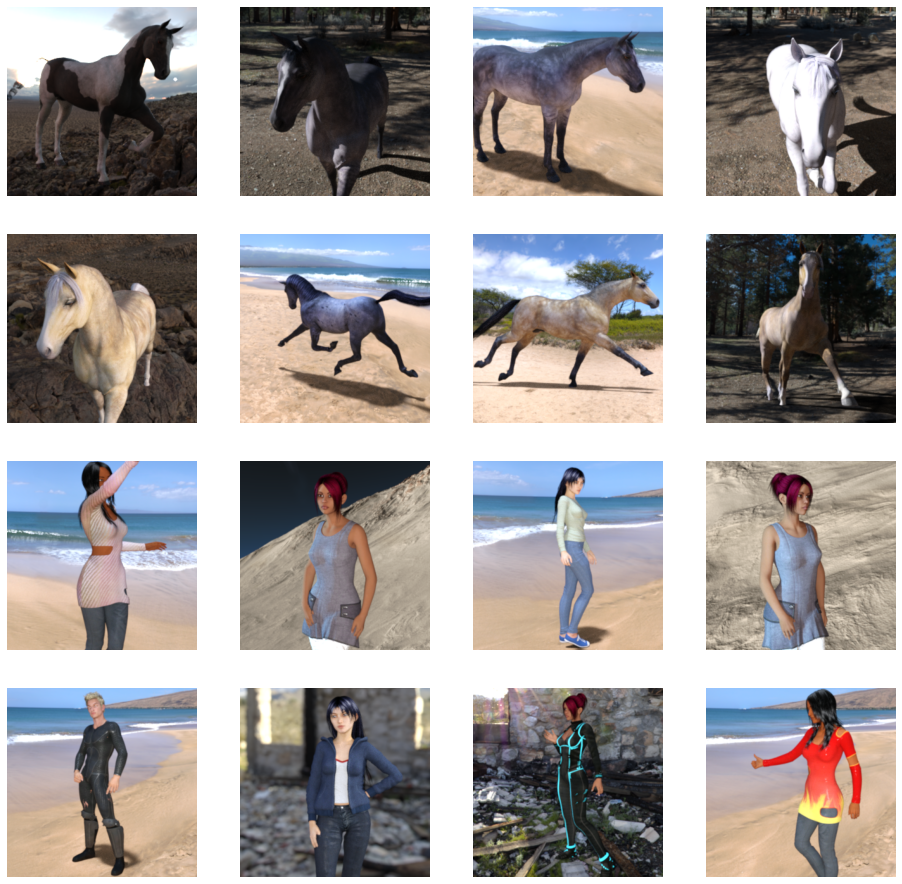

In [38]:
 %matplotlib inline

 import matplotlib.pyplot as plt
 import matplotlib.image as mpimg

 nrows = 4
 ncols = 4

 pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                   for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix = [os.path.join(train_human_dir, fname)
                   for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


Irei criar uma Rede Neural Convolucional. A rede consiste em várias camadas convolucionais (Conv2D) e de pooling (MaxPooling2D), seguidas por camadas densas (Dense) e uma camada de saída. Cada camada convolucional aplica um conjunto de filtros que detectam características específicas da imagem e reduzem o tamanho da saída.

Depois de todas as camadas convolucionais e de pooling, a saída é achatada com a camada Flatten, que transforma os dados em um vetor. Em seguida, a camada Dense com 512 neurônios e a função de ativação ReLU é adicionada, seguida pela camada Dense final com um neurônio e a função de ativação sigmoid, que retorna um valor entre 0 e 1 representando a probabilidade de a imagem pertencer a uma das classes.

In [62]:
import tensorflow as tf

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')


])

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 35, 35, 64)      

In [64]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dategen = ImageDataGenerator(rescale=1/255)
validation_dategen = ImageDataGenerator(rescale=1/255)

train_generator = train_dategen.flow_from_directory(
    './horse-or-human/',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_dategen.flow_from_directory(
    './validation-horse-or-human/',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [66]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 72s 9s/step - loss: 0.9481 - accuracy: 0.5706 - val_loss: 0.6840 - val_accuracy: 0.5039
Epoch 2/15
8/8 [==============================] - 63s 8s/step - loss: 0.6844 - accuracy: 0.6085 - val_loss: 0.6659 - val_accuracy: 0.5117
Epoch 3/15
8/8 [==============================] - 66s 8s/step - loss: 0.7520 - accuracy: 0.6618 - val_loss: 0.5595 - val_accuracy: 0.6719
Epoch 4/15
8/8 [==============================] - 64s 8s/step - loss: 0.4620 - accuracy: 0.8120 - val_loss: 1.3803 - val_accuracy: 0.6133
Epoch 5/15
8/8 [==============================] - 63s 8s/step - loss: 0.5039 - accuracy: 0.8231 - val_loss: 0.9482 - val_accuracy: 0.7812
Epoch 6/15
8/8 [==============================] - 63s 8s/step - loss: 0.5862 - accuracy: 0.7786 - val_loss: 0.6510 - val_accuracy: 0.6992
Epoch 7/15
8/8 [==============================] - 63s 8s/step - loss: 0.2793 - accuracy: 0.8943 - val_loss: 0.8231 - val_accuracy: 0.7891
Epoch 8/15
8/8 [==================

In [76]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

    path = '/content/' + fn
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + ' é humano.')
    else:
        print(fn + ' é cavalo')

Saving cavalo2.jpg to cavalo2 (2).jpg
1/1 [==============================] - 0s 37ms/step
[0.3024626]
cavalo2.jpg é cavalo


In [77]:
classes[0]

array([0.3024626], dtype=float32)